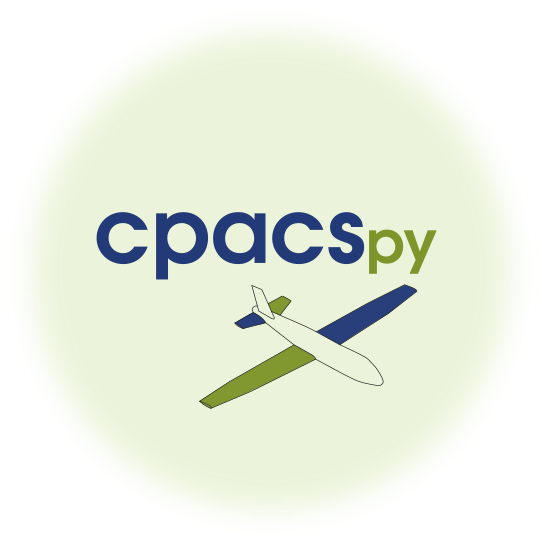

cpacspy
=========

cpacspy is a Python package to read, write, interact and analyse
[CPACS](https://www.cpacs.de/) files and esspecially AeroPerformanceMaps.

Installation
-----------------

You need to have [TIXI](https://github.com/DLR-SC/tixi) and
[TIGL](https://github.com/DLR-SC/tigl) install on your computer to use
this package. The easiest way is to use a Conda environment, to create
one:

-   Install Miniconda: <https://docs.conda.io/en/latest/miniconda.html>
-   Clone this repository and create a Conda environment with the
    following command:

``` {.sourceCode .bash}
$ git clone https://github.com/cfsengineering/cpacspy.git
$ cd cpacspy
$ conda env create -f environment.yml
$ conda activate cpacspy_env
```

-   When it is done or if you already have TIXI and TIGL install on your
    computer:

``` {.sourceCode .bash}
$ pip install cpacspy
```

To build and install locally
------------------------------

``` {.sourceCode .bash}
$ cd cpacspy
$ python -m build
$ pip install --user .
```

License
-------------

**License:** Apache-2.0

How to use this package
-------------------------------------

Follow the example bellow:

In [ ]:
import sys
sys.path.append('../src/')

# Importing cpacspy
from cpacspy.cpacspy import CPACS

In [ ]:
# Load a CPACS file
cpacs = CPACS('D150_simple.xml')

In [ ]:
# For each object you can print it to see what it contains or use 'help(...)' to see associated functions
print(cpacs)

In [ ]:
print(cpacs.aircraft)

In [ ]:
help(cpacs)

Aircraft value
---------------

In [ ]:
cpacs.aircraft.ref_lenght

In [ ]:
cpacs.aircraft.ref_area


In [ ]:
(cpacs.aircraft.ref_point_x,cpacs.aircraft.ref_point_y,cpacs.aircraft.ref_point_z)

Wing value
------------
(by default the largest wing is the reference one)

In [ ]:
cpacs.aircraft.wing_ar

In [ ]:
cpacs.aircraft.wing_span

In [ ]:
cpacs.aircraft.wing_area

In [ ]:
# You can also change the reference wing by its index
cpacs.aircraft.ref_wing_idx = 3 

cpacs.aircraft.wing_area

In [ ]:
# or by its uid
cpacs.aircraft.ref_wing_uid = 'Wing2H'

cpacs.aircraft.wing_area

AeroMaps
--------------

In [ ]:
# Get list of all available aeroMaps
cpacs.get_aeromap_uid_list()

In [ ]:
# or loop through all aeroMaps
for aeromap in cpacs.aeromaps:
    print('---')
    print(aeromap.uid)
    print(aeromap.description)

In [ ]:
# Get a specific aeromap from its uid
ext_aeromap = cpacs.get_aeromap_by_uid('extended_aeromap')
print(ext_aeromap)

In [ ]:
# Get specific values
ext_aeromap.get('angleOfAttack',alt=15500.0,aos=0.0,mach=0.3)

In [ ]:
ext_aeromap.get('cl',alt=15500.0,aos=0.0,mach=[0.3,0.4,0.5])

In [ ]:
# Plot values from the aeromap
ext_aeromap.plot('cd','cl',alt=15500,aos=0.0,mach=0.5)

In [ ]:
ext_aeromap.plot('angleOfAttack','cd',alt=15500,aos=0.0,mach=0.5)

In [ ]:
# Create new aeromap 
new_aeromap = cpacs.create_aeromap('my_new_aeromap')
new_aeromap.description = 'Test the creation of a new aeromap'

In [ ]:
# Add a values into the new aeromap
new_aeromap.add_row(mach=0.555,alt=15000,aos=0.0,aoa=0,cd=0.001,cl=0.1,cs=0.0,cmd=0.0,cml=1.1,cms=0.0)

In [ ]:
# Remove a row from its paramters
new_aeromap.remove_row(mach=0.555,alt=15000,aos=0.0,aoa=0)

In [ ]:
# Add a values into the new aeromap
for i in range(12):
    new_aeromap.add_row(mach=0.555,alt=15000,aos=0.0,aoa=i,cd=0.001*i*i,cl=0.1*i,cs=0.0,cmd=0.0,cml=1.1,cms=0.0)

In [ ]:
print(new_aeromap)

In [ ]:
# Save the new aeromap
new_aeromap.save()

In [ ]:
# Delete an aeromap
cpacs.delete_aeromap('aeromap_test1')
cpacs.get_aeromap_uid_list()

In [ ]:
# Duplicate an aeromap
duplicated_aeromap = cpacs.duplicate_aeromap('my_new_aeromap', 'my_duplicated_aeromap')
duplicated_aeromap.add_row(mach=0.666,alt=10000,aos=0.0,aoa=2.4,cd=0.001,cl=1.1,cs=0.22,cmd=0.22)

In [ ]:
print(duplicated_aeromap)

In [ ]:
# Coefficient are stored in a Pandas DataFrame, so you can apply any operation on it
duplicated_aeromap.df['cd'] = duplicated_aeromap.df['cd'].apply(lambda x: x*2-0.2)
duplicated_aeromap.get('cd')

In [ ]:
# Export to a CSV file
duplicated_aeromap.export_csv('aeromap.csv')

In [ ]:
# Import from CSV
imported_aeromap = cpacs.create_aeromap_from_csv('aeromap.csv','imported_aeromap')
imported_aeromap.description = 'This aeromap has been imported from a CSV file'
imported_aeromap.save()

In [ ]:
print(imported_aeromap)

In [ ]:
# AeroMap with damping derivatives coefficients
aeromap_dd = cpacs.duplicate_aeromap('imported_aeromap','aeromap_dd')
aeromap_dd.description = 'Aeromap with damping derivatives coefficients'
print(aeromap_dd)

In [ ]:
# Add damping derivatives coefficients to the aeromap
aeromap_dd.add_damping_derivatives(alt=15000,mach=0.555,aos=0.0,aoa=0.0,coef='cd',axis='dp',value=0.001,rate=-1.0)

- Coefficients must be one of the following: 'cd', 'cl', 'cs', 'cmd', 'cml', 'cms'

- Axis must be one of the following: 'dp', 'dq', 'dr'

- The sign of the rate will determine if the coefficient are stored in /positiveRate or /negativeRate

In [ ]:
# Could be added in a loop
for i in range(11):
    aeromap_dd.add_damping_derivatives(alt=15000,mach=0.555,aos=0.0,aoa=i+1,coef='cd',axis='dp',value=0.001*i+0.002,rate=-1.0)
aeromap_dd.save()

In [ ]:
aeromap_dd.df

In [ ]:
# Get damping derivatives coefficients
aeromap_dd.get_damping_derivatives(alt=15000,mach=0.555,coef='cd',axis='dp',rates='neg')

In [ ]:
aeromap_dd.get_damping_derivatives(alt=15000,mach=0.555,aoa=[4.0,6.0,8.0],coef='cd',axis='dp',rates='neg')

In [ ]:
# Also works with the simple "get" function, but the "coef name" is a bit more complicated
aeromap_dd.get('dampingDerivatives_negativeRates_dcddpStar',aoa=[4.0,6.0,8.0])

In [ ]:
# Damping derivatives coefficients can alos be plotted
aeromap_dd.plot('angleOfAttack','dampingDerivatives_negativeRates_dcddpStar',alt=15000,aos=0.0,mach=0.555)

Analyses
-----------

In [ ]:
# CD0 and oswald factor
ar = cpacs.aircraft.wing_ar
cd0,e = ext_aeromap.get_cd0_oswald(ar,alt=15500.0,aos=0.0,mach=0.5)

In [ ]:
# Get Forces [N]
ext_aeromap.calculate_forces(cpacs.aircraft)
print(ext_aeromap.get('cd',alt=15500.0,aos=0.0,mach=[0.3,0.4,0.5]))
print(ext_aeromap.get('drag',alt=15500.0,aos=0.0,mach=[0.3,0.4,0.5]))

In [ ]:
ext_aeromap.plot('angleOfAttack','drag',alt=15500,aos=0.0,mach=0.5)

In [ ]:
ext_aeromap.df

Save the CPACS file

In [ ]:
# Save all the change in a CPACS file
cpacs.save_cpacs('D150_simple_updated_aeromap_tmp.xml',overwrite=True)






Futur improvements
-----------------------

* Add possiblity to store incrementMaps (Control surface, landing gear, etc
* Add more aerodynamics analysis
* Interpolation (surrogate?) between existing points

Open source project
-----------------------

If you are interested to participate to the development of cpacspy let me know.

* https://github.com/cfsengineering/cpacspy